In [5]:
import cv2 as cv
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

## Add colored masks to detected trees to facilitate tracking

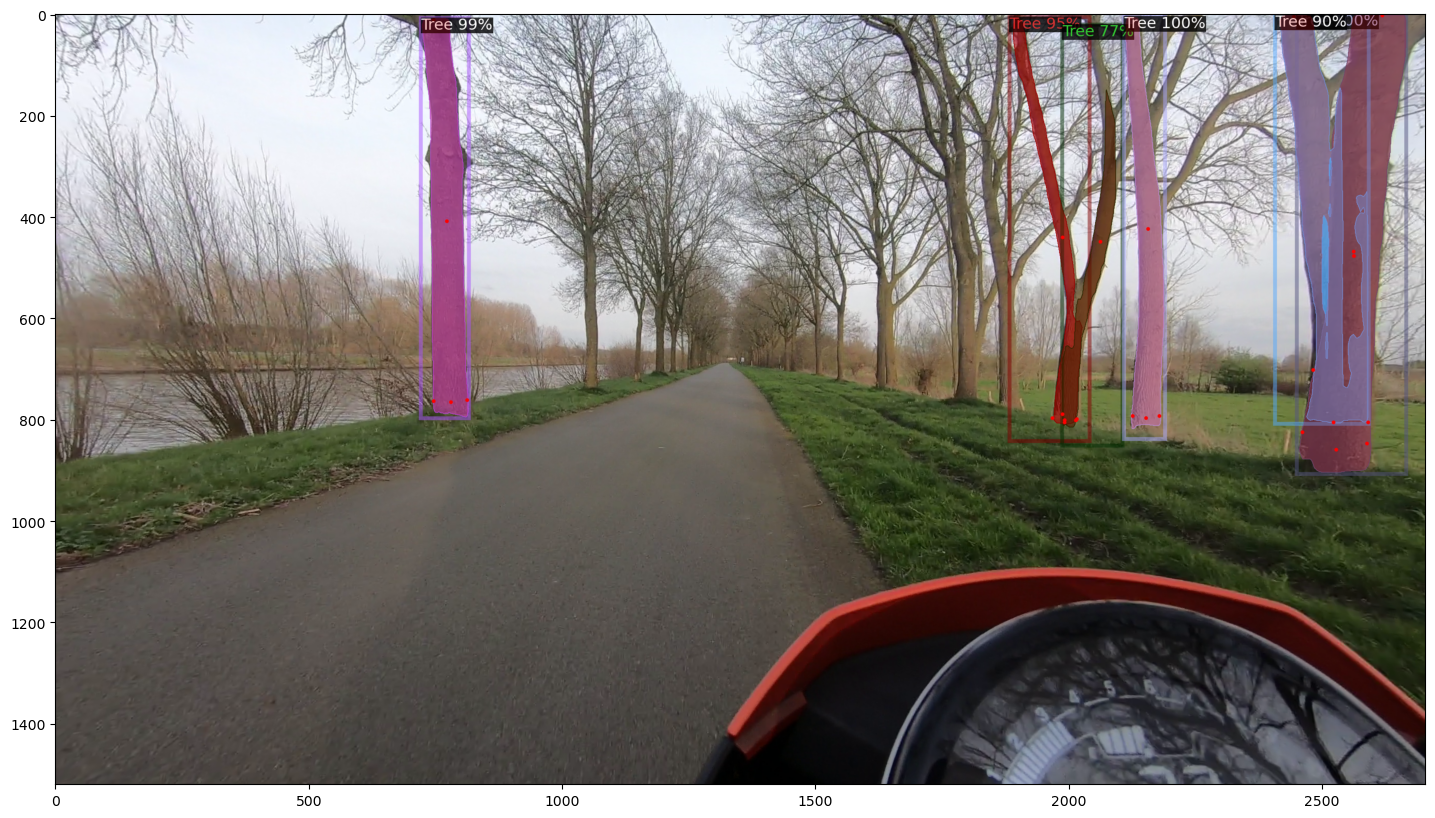

In [19]:
# sample data
#image_path = './assets/annotated_05/eastbound/eastbound_20240319_07816.png'
image_path = './assets/undistorted_05/eastbound/eastbound_20240319_07816.png'

img = cv2.imread(image_path)
img = img[:,:,::-1]

# # sample mask
mask_path = './assets/annotated_05/eastbound/eastbound_20240319_07816_pred_mask.npy'
masks = np.load(mask_path)
num_of_masks = masks.shape[0]

combined_mask = masks[0]
for i in range(1,num_of_masks):
    mask = masks[i]
    combined_mask = np.logical_or(combined_mask, mask)

# CHOOSE MASK COLOR HERE
color = np.array([255,0,0], dtype='uint8')

# # equal color where mask, else image
# # this would paint your object silhouette entirely with `color`
# mask = masks[0]
masked_img = np.where(combined_mask[...,None], color, img)

# # use `addWeighted` to blend the two images
# # the object will be tinted toward `color`
out = cv2.addWeighted(img, 0.8, masked_img, 0.2,0)

plt.figure(figsize=(20, 10))
plt.imshow(out)
plt.show()

In [20]:
# (Ik heb undistorted momenteel niet lokaal staan, dus vandaar dat 
# de demo afbeelding niet perfect is, Ik ben wat gehaast en ga het later eens fixen)